<a href="https://colab.research.google.com/github/sameershaik-tech/weather_predection/blob/main/WEATHERPREDECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##importing libraries

In [264]:
import numpy as np  #numpy
import pandas as pd  #pandas
import tensorflow as tf
#System libraries
import glob #The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell

#Map plotting 
import folium #Interactive Maps viz

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#math operations lib 
import math
from math import pi

#date manipulation 
import datetime as dt
import missingno as mn


#Deep learning with keras
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Splitting data to test and train 
from sklearn.model_selection import train_test_split

import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from collections import Counter
import time
import datetime as dt
from datetime import datetime
import collections
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib.pyplot import rcParams

from sklearn import linear_model

##Check out the data

In [265]:
data = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv')
data.head() 

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [266]:
# check datatypes
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [267]:
#Categorical variables:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [268]:

data['Date'] = pd.to_datetime(data['Formatted Date'])


In [269]:
data['Date'] = pd.to_datetime(data['Date'], utc=True)

In [270]:

data['Date'] = pd.to_datetime(data.Date, format='%Y-%m-%d %H:%M:%S')

In [271]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00


In [272]:
data['year'] = data['Date'].dt.year

In [273]:
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,year,month,day,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,2006,4,1,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,2006,4,1,2


In [274]:
#Quantitative variables:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)', 'year', 'month', 'day', 'hour'],
      dtype='object')


In [275]:
data[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),year,month,day,hour
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.00000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,2011.00029,6.523001,15.727100,11.499891
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,3.16216,3.448501,8.802216,6.922049
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2005.00000,1.000000,1.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,2008.00000,4.000000,8.000000,6.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,2011.00000,7.000000,16.000000,11.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,2014.00000,10.000000,23.000000,17.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,2016.00000,12.000000,31.000000,23.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe607fa39d0>,
      dtype=object)

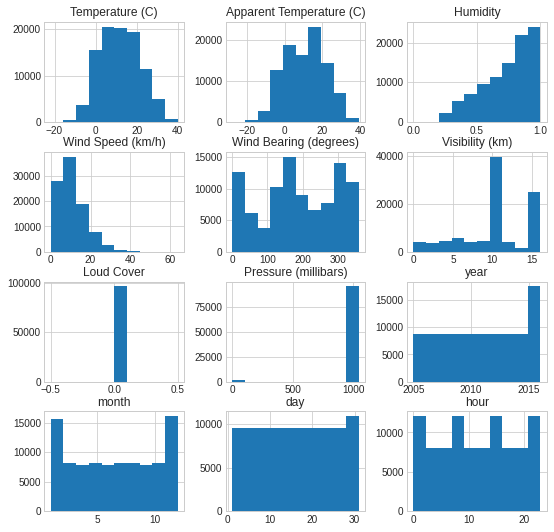

In [276]:
rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

##'Loud Cover' takes values zero. We drop it

In [277]:
data=data.drop('Loud Cover',axis=1)

##"Pressure (millibars)".

Some observations are nil. It seems that they lack values. because the pressure does not take zero as value

Let's fill the zeros with the median:

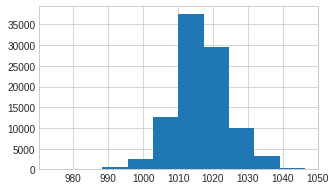

In [278]:
pressure_median = data['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
data["Pressure (millibars)"] = data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
data['Pressure (millibars)'].hist()

##Categorical variables

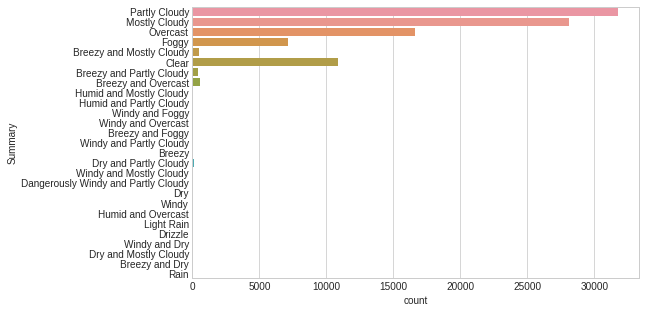

In [279]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['Summary'])

In [280]:
data['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                 20085
Partly cloudy throughout the day.                                                  9981
Partly cloudy until night.                                                         6169
Partly cloudy starting in the morning.                                             5184
Foggy in the morning.                                                              4201
                                                                                  ...  
Partly cloudy starting in the morning and breezy in the evening.                     24
Mostly cloudy starting in the morning and windy in the evening.                      24
Breezy starting in the morning continuing until night.                               24
Breezy and foggy starting in the evening.                                            24
Foggy starting overnight continuing until morning and breezy in the afternoon.       23
Name: Daily Summary, Length: 214

In [281]:
data['Summary'].value_counts(dropna=False)

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [282]:
data['Precip Type'].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [283]:
data.fillna(method='ffill', inplace=True)

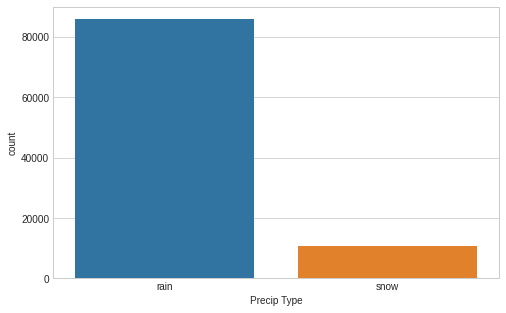

In [284]:
sns.countplot(x=data['Precip Type'])

In [285]:
# Calculate total number of cells in dataframe
totalCells = np.product(data.shape)

# Count number of missing values per column
missingCount = data.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()

# Calculate percentage of missing values
print("The weather history dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The weather history dataset contains 0.0 % missing values.


<Figure size 1296x576 with 0 Axes>

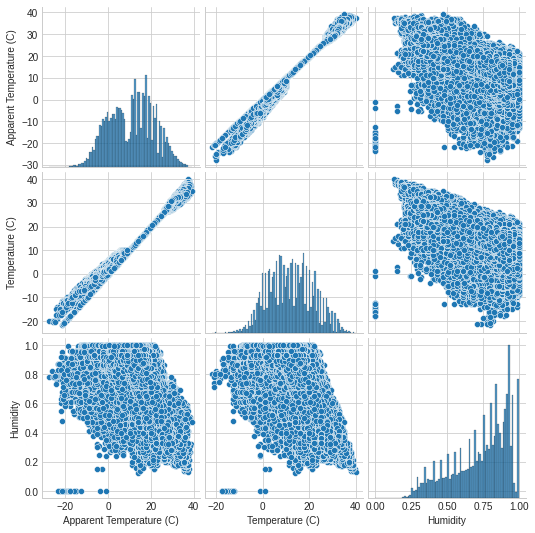

In [286]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]])
plt.show()

<Figure size 1296x576 with 0 Axes>

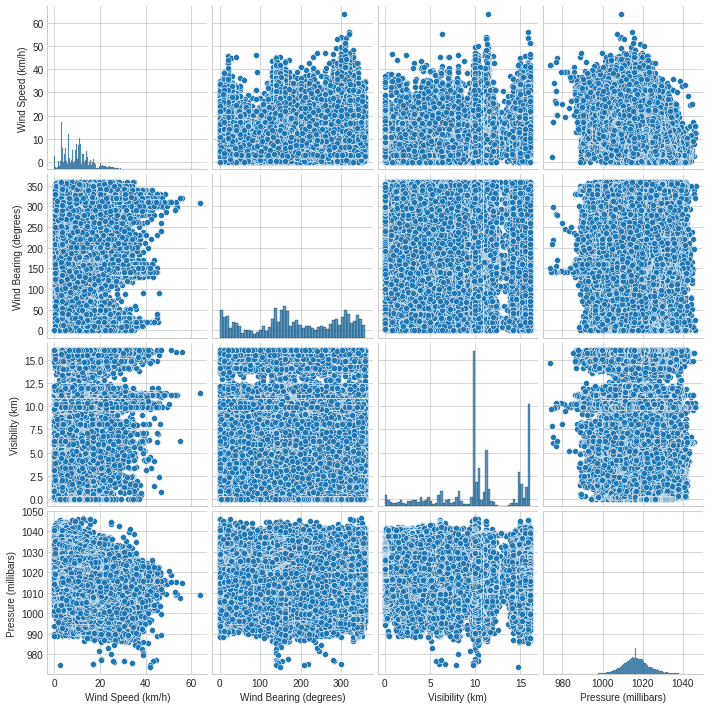

In [287]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.show()

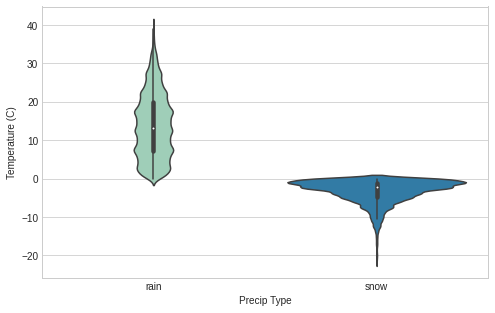

In [288]:
sns.violinplot(x="Precip Type", y="Temperature (C)", data=data, palette="YlGnBu");

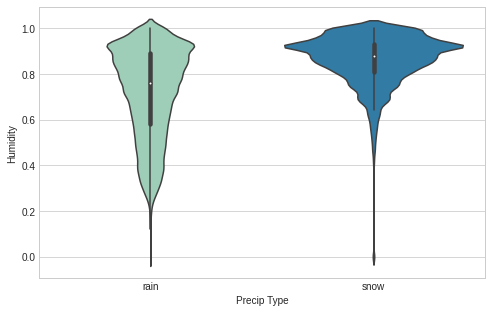

In [289]:
sns.violinplot(x="Precip Type", y="Humidity", data=data, palette="YlGnBu");

With these plots we can choose two variables to study the relationship betweem them.

In this study let's focus to explore Temperature as a function of Humidity : how humidity influences in temperature?.

##Linear Regression

In [290]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ls = linear_model.LinearRegression()



X = data["Humidity"].values.reshape(-1,1)
y = data["Temperature (C)"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    shuffle=True, random_state=0)
print("Linear Regression")
ls.fit(X_train, y_train)
print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)
print("\n\nCalculating some regression quality metrics")
y_pred = ls.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))

Linear Regression
alpha =  [-30.86657506]
beta =  [34.61438171]


Calculating some regression quality metrics
MSE =  54.71624111922442
R2 =  0.4004047204664315


##Decision Tree Classifier


first of all i'm going to change the categorical variables to numeric

In [291]:
def change_category_to_number(DailySummaryCat):
    if DailySummaryCat=='Partly cloudy throughout the day.':
        return 1
    elif DailySummaryCat=='Mostly cloudy throughout the day.':
        return 2
    elif DailySummaryCat=='Foggy in the evening.':
        return 3
    elif DailySummaryCat=='Foggy overnight and breezy in the morning.':
        return 4
    elif DailySummaryCat=='Overcast throughout the day.':
        return 5
    elif DailySummaryCat=='Partly cloudy until night.':
        return 6
    elif DailySummaryCat=='Motly cloudy until night.':
        return 7
    elif DailySummaryCat=='Foggy starting overnight continuing until morning.':
        return 8
    elif DailySummaryCat=='Foggy in the morning.':
        return 9
    elif DailySummaryCat=='Partly cloudy until evening.':
        return 10
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 11
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until night.':
        return 12
    elif DailySummaryCat=='Partly cloudy starting in the afternoon.':
        return 13
    elif DailySummaryCat=='Partly cloudy starting overnight.':
        return 14
    elif DailySummaryCat=='Mostly cloudy starting overnight.':
        return 15
    elif DailySummaryCat=='Mostly cloudy until night and breezy in the afternoon.':
        return 16
    elif DailySummaryCat=='Mostly cloudy until evening.':
        return 17
    elif DailySummaryCat=='Foggy throughout the day.':
        return 18
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 19
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening.':
        return 20
    elif DailySummaryCat=='Foggy until morning.':
        return 21
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until night.':
        return 22
    elif DailySummaryCat=='Mostly cloudy starting in the morning.':
        return 23
    elif DailySummaryCat=='Foggy starting in the evening.':
        return 24
    elif DailySummaryCat=='Partly cloudy starting in the afternoon continuing until evening.':
        return 25
    elif DailySummaryCat=='Foggy overnight.':
        return 26
    elif DailySummaryCat=='Clear throughout the day.':
        return 27
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until night.':
        return 28
    elif DailySummaryCat=='Partly cloudy overnight.':
        return 29
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening.':
        return 30
    elif DailySummaryCat=='Foggy until night.':
        return 31
    elif DailySummaryCat=='Partly cloudy in the morning.':
        return 32
    elif DailySummaryCat=='Foggy starting overnight continuing until afternoon.':
        return 33
    elif DailySummaryCat=='Foggy until afternoon.':
        return 34
    elif DailySummaryCat=='Breezy and mostly cloudy overnight.':
        return 35
    elif DailySummaryCat=='Partly cloudy overnight and breezy starting in the morning continuing until afternoon.':
        return 36
    elif DailySummaryCat=='Breezy in the morning and foggy in the evening.':
        return 37
    elif DailySummaryCat=='Mostly cloudy until evening and breezy in the evening.':
        return 38
    elif DailySummaryCat=='Mostly cloudy starting in the evening.':
        return 39
    elif DailySummaryCat=='Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.':
        return 40
    elif DailySummaryCat=='Breezy starting in the morning continuing until night.':
        return 41
    elif DailySummaryCat=='Overcast throughout the day and breezy starting overnight continuing until morning.':
        return 42
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and foggy in the evening.':
        return 43
    elif DailySummaryCat=='Light rain until morning.':
        return 44
          
    elif DailySummaryCat=='Mostly cloudy until night and breezy starting in the afternoon continuing until night.':
        return 45
    elif DailySummaryCat=='Mostly cloudy starting in the morning continuing until afternoon.':
        return 46
    elif DailySummaryCat=='Breezy until afternoon and overcast throughout the day.':
        return 47
    elif DailySummaryCat=='Partly cloudy until evening and breezy in the afternoon.':
        return 48
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.':
        return 49
    elif DailySummaryCat=='Light rain starting overnight.':
        return 50
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until evening.':
        return 51
    elif DailySummaryCat=='Foggy starting in the morning continuing until evening and breezy in the evening.':
        return 52
    elif DailySummaryCat=='Partly cloudy throughout the day and breezy in the afternoon.':
        return 53
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.':
        return 54
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy in the morning.':
        return 55
    elif DailySummaryCat=='Overcast throughout the day and breezy overnight.':
        return 56
    elif DailySummaryCat=='Light rain in the morning.':
        return 57
    elif DailySummaryCat=='Rain until morning.':
        return 58
    elif DailySummaryCat=='Breezy in the morning and mostly cloudy starting in the evening.':
        return 59
    elif DailySummaryCat=='Mostly cloudy starting in the morning and breezy overnight.':
        return 60
    elif DailySummaryCat=='Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.':
        return 61
    elif DailySummaryCat=='Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.':
        return 62
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening and breezy in the afternoon.':
        return 63
    elif DailySummaryCat=='Foggy starting overnight continuing until morning and breezy in the afternoon.':
        return 64

In [292]:
# assign a numerical value to the categorical field of class, by using the above function
data['DailySummaryCat'] = data['Daily Summary'].apply(change_category_to_number)

In [293]:
data.fillna(method='ffill', inplace=True) 

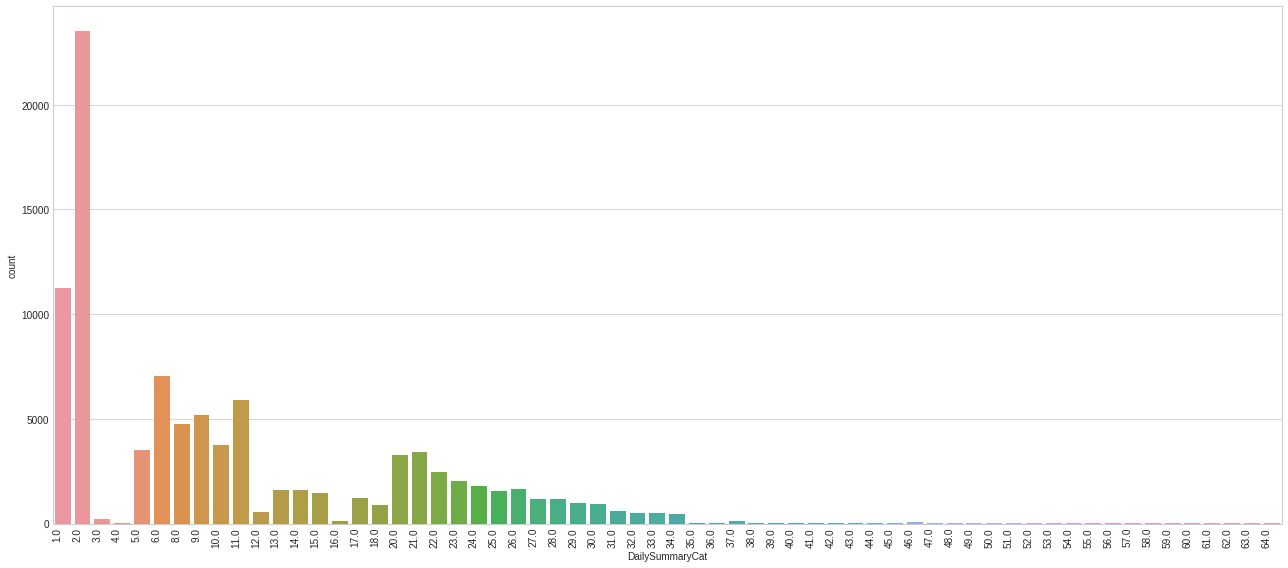

In [294]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['DailySummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [295]:
def change_category(Summary):
    if Summary=='Partly Cloudy':
        return 1
    elif Summary=='Mostly Cloudy':
        return 2
    elif Summary=='Foggy':
        return 3
    elif Summary=='Clear':
        return 4
    elif Summary=='Overcast':
        return 5
    elif Summary=='Breezy and Overcast':
        return 6
    elif Summary=='Breezy and Partly Cloudy':
        return 7
    elif Summary=='Breezy and Mostly Cloudy':
        return 8
    elif Summary=='Dry and Partly Cloudy':
        return 9
    elif Summary=='Windy and Partly Cloudy':
        return 10
    elif Summary=='Light Rain':
        return 11
    elif Summary=='Breezy':
        return 12
    elif Summary=='Windy and Overcast':
        return 13
    elif Summary=='Humid and Mostly Cloudy':
        return 14
    elif Summary=='Drizzle':
        return 15
    elif Summary=='Windy and Mostly Cloudy':
        return 16
    elif Summary=='Breezy and Foggy':
        return 17
    elif Summary=='Dry':
        return 18
    elif Summary=='Humid and Partly Cloudy':
        return 19
    elif Summary=='Dry and Mostly Cloudy':
        return 20
    elif Summary=='Rain':
        return 21
    elif Summary=='Windy':
        return 22
    elif Summary=='Humid and Overcast':
        return 23
    elif Summary=='Windy and Foggy':
        return 24
    elif Summary=='Dangerously Windy and Partly Cloudy':
        return 25
    elif Summary=='Windy and Dry':
        return 26
    elif Summary=='Breezy and Dry':
        return 27

In [296]:
# assign a numerical value to the categorical field of class, by using the above function
data['SummaryCat'] = data['Summary'].apply(change_category)

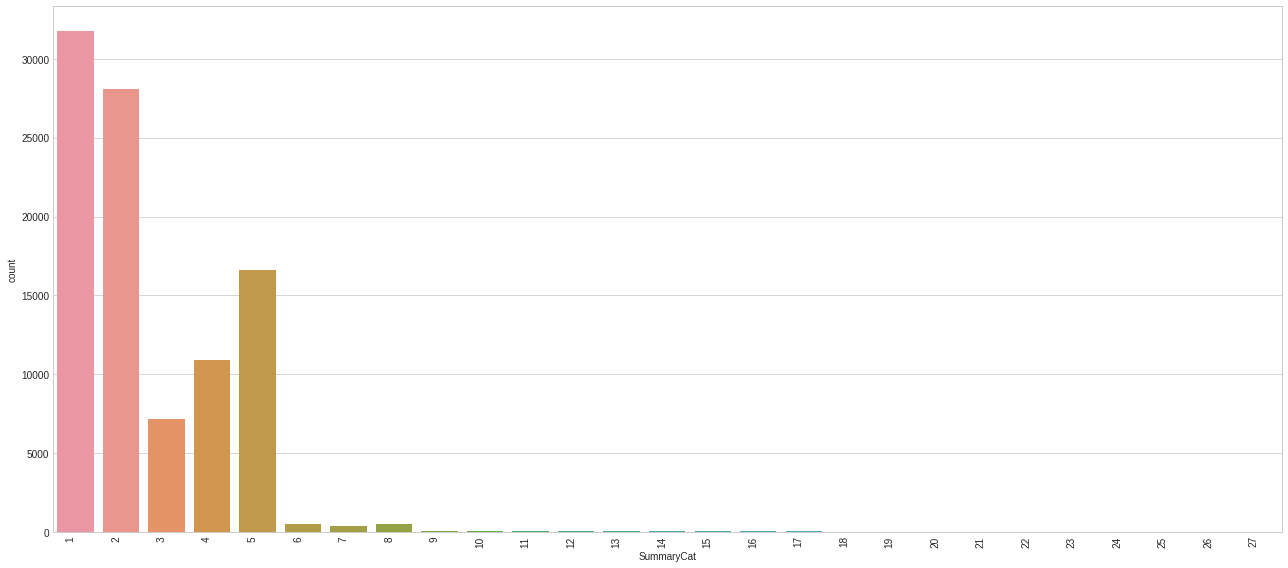

In [297]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['SummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()


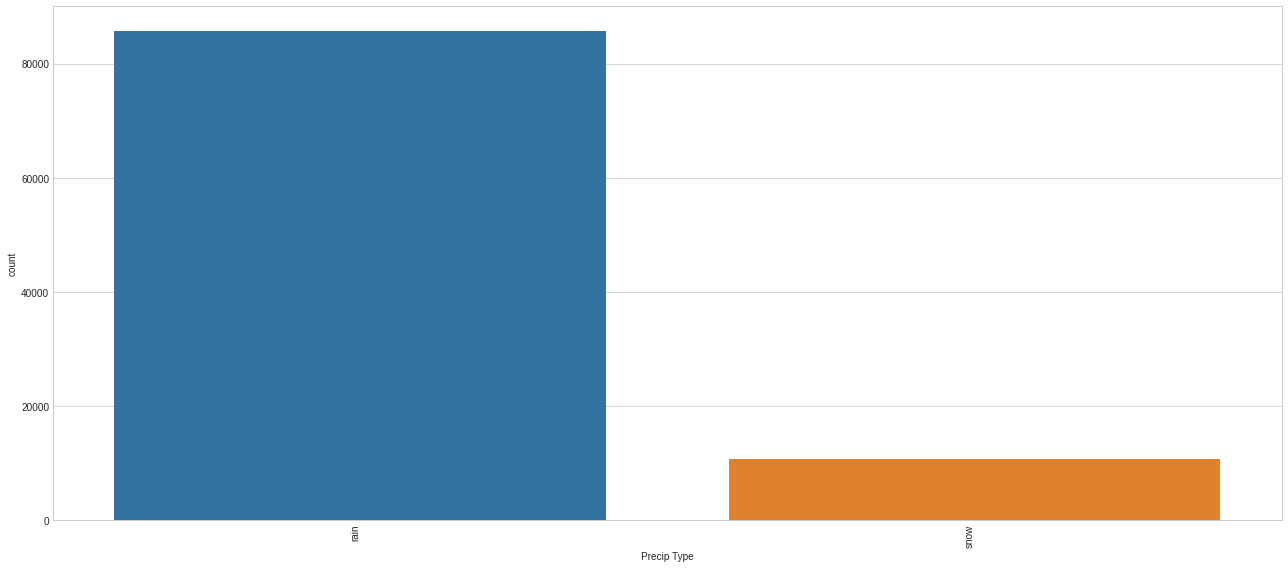

In [298]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['Precip Type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [299]:
data.drop(['Formatted Date','Summary','Daily Summary','Precip Type','Date'],axis=1,inplace=True)
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,hour,DailySummaryCat,SummaryCat
0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2006,3,31,22,1.0,1
1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2006,3,31,23,1.0,1
2,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,2006,4,1,0,1.0,2
3,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2006,4,1,1,1.0,1
4,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,2006,4,1,2,1.0,2


In [300]:
X = data.drop('DailySummaryCat', axis=1)
y = data['DailySummaryCat']

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [303]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,random_state=0)

In [304]:
dtClassifer.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [305]:
prediction = dtClassifer.predict(X_test)

In [306]:
prediction[:100]

array([ 6.,  1.,  2.,  2.,  6.,  2.,  6.,  6.,  2.,  2.,  2.,  1.,  6.,
        2.,  6.,  2.,  1.,  2.,  2., 20.,  2.,  2.,  2.,  6.,  2.,  1.,
        2., 20.,  2.,  1.,  8.,  2.,  2.,  2.,  1.,  1.,  1.,  6.,  6.,
        1.,  2.,  2.,  2.,  1.,  2.,  6.,  6., 20.,  6.,  2.,  2.,  2.,
        2.,  6.,  2.,  6.,  8.,  8.,  1.,  2.,  6.,  2.,  2.,  2.,  6.,
        2.,  1.,  2.,  6.,  1.,  2.,  2.,  2., 20.,  2.,  2.,  2.,  2.,
        1.,  6.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  6., 20.,  2.,
        1.,  2.,  2.,  2.,  2.,  2., 20.,  2., 18.])

In [307]:
y_test[:100]

65391    22.0
95001     6.0
69642     1.0
69570     2.0
4310     20.0
         ... 
16840     6.0
78281     2.0
75344    27.0
14366     2.0
56071    21.0
Name: DailySummaryCat, Length: 100, dtype: float64

In [308]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.29133259607409456

##Logistic Regression

In [309]:
lrClassifier = LogisticRegression()

In [ ]:
lrClassifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
prediction = lrClassifier.predict(X_test)

In [ ]:
prediction[:3000]

In [ ]:
y_test[:100]

In [ ]:
accuracy_score(y_true=y_test, y_pred=prediction)

##Visualization. Weather calendar

In [ ]:
#Drawing a heatmap
def facet_heatmap(data, color, **kws):
    values=data.columns.values[3]
    data = data.pivot(index='day', columns='hour', values=values)
    sns.heatmap(data, cmap='coolwarm', **kws)  

#Joining heatmaps of every month in a year 
def weather_calendar(year,weather): #Year= Any year in DataFrame. Weather=Any quantitative variable
    datayear = data[data['year']==year][['month', 'day', 'hour', weather]]
    vmin=datayear[weather].min()
    vmax=datayear[weather].max()
    with sns.plotting_context(font_scale=12):
        g = sns.FacetGrid(datayear,col="month", col_wrap=3) #One heatmap per month
        g = g.map_dataframe(facet_heatmap,vmin=vmin, vmax=vmax)
        g.set_axis_labels('Hour', 'Day')
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle('%s Calendar. Year: %s.' %(weather, year), fontsize=18)

In [ ]:
weather_calendar(2006,'Temperature (C)')

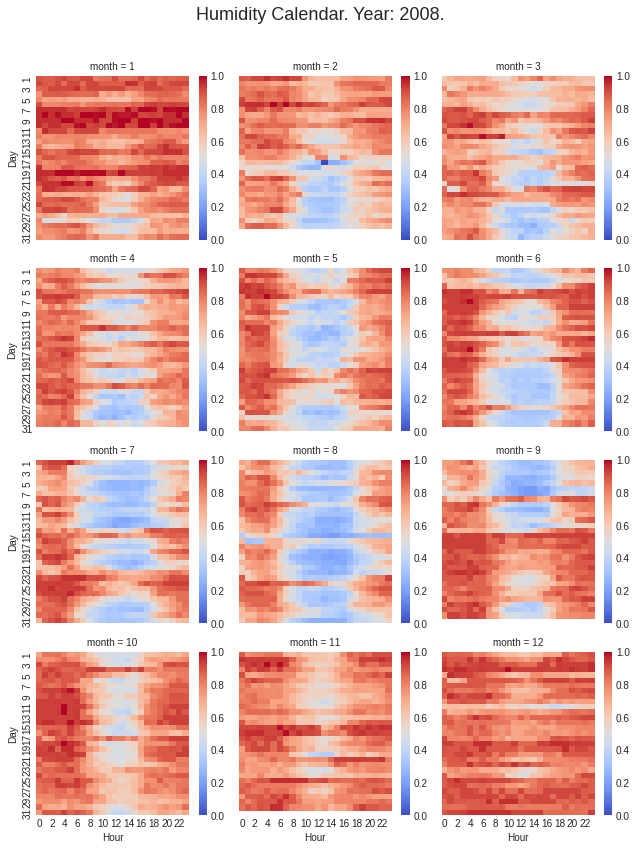

In [317]:
weather_calendar(2008,'Humidity')

##Neural Model for Weather Prediction

In [318]:
data_neur=data

In [319]:
data_neur['T'] = data['Temperature (C)']
data_neur['TA'] = data['Apparent Temperature (C)']
data_neur['H'] = data['Humidity']
data_neur['WS'] = data['Wind Speed (km/h)']
data_neur['WB'] = data['Wind Bearing (degrees)']
data_neur['V'] = data['Visibility (km)']
data_neur['P'] = data['Pressure (millibars)']
data_neur['Y'] = data['year']
data_neur['M'] = data['month']
data_neur['D'] = data['day']
data_neur['HR'] = data['hour']
data_neur['SC'] = data['SummaryCat']

data.drop(['hour','day','month','year','Pressure (millibars)','Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','SummaryCat'],axis=1,inplace=True)
data_neur.head()

,DailySummaryCat,T,TA,H,WS,WB,V,P,Y,M,D,HR,SC
0,1.0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2006,3,31,22,1
1,1.0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2006,3,31,23,1
2,1.0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,2006,4,1,0,2
3,1.0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2006,4,1,1,1
4,1.0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,2006,4,1,2,2


In [320]:
# X will be a pandas dataframe of all columns except meantempm
X = data_neur[[col for col in data_neur.columns if col != 'DailySummaryCat']]

# y will be a pandas series of the meantempm
y = data_neur['DailySummaryCat']

In [321]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [322]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   77162, Training features   12
Validation instances 9646, Validation features 12
Testing instances    9645, Testing features    12


In [323]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [324]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [325]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=260): # 260 is used as we have approx 570 dataset for training
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [326]:
print(tf.__version__)

2.6.0


In [327]:
!pip install tensorflow --upgrade
!pip install keras --upgrade